# **Analizing Pizza Restaurant Sales**

This notebook looks to develop some EDA for a Pizza Restaurant.

I am going to take the following approach:
1. Problem definition (Already above)
2. Data
3. Evaluation
4. Features

## **1. Problem definition**

Using this dataset, I am about to answer the following question using Python and Power BI.

1. What days and times does the resaurant tend to be busy?

## **2. Data**

The data is downloaded from Kaggle:
https://www.kaggle.com/datasets/shilongzhuang/pizza-sales/data

## **3. Evaluation**

Im going to be using Power BI and Python to answer the question from above

## **4. Features**

This pizza sales dataset make up 12 relevant features:

1. **order_id:** Unique identifier for each order placed by a table
2. **order_details_id:** Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
3. **pizza_id:** Unique key identifier that ties the pizza ordered to its details, like size and price
4. **quantity:** Quantity ordered for each pizza of the same type and size
5. **order_date:** Date the order was placed (entered into the system prior to cooking & serving)
6. **order_time:** Time the order was placed (entered into the system prior to cooking & serving)
7. **unit_price:** Price of the pizza in USD
8. **total_price:** unit_price * quantity
9. **pizza_size:** Size of the pizza (Small, Medium, Large, X Large, or XX Large)
10. **pizza_type:** Unique key identifier that ties the pizza ordered to its details, like size and price
11. **pizza_ingredients:** ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
12. **pizza_name:** Name of the pizza as shown in the menu

In [1]:
%cd /content/drive/MyDrive/Ideas/Data_Science_exercises/Pizza_Restaurant_Sales

/content/drive/MyDrive/Ideas/Data_Science_exercises/Pizza_Restaurant_Sales


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset.

There is a short check list:

1. What question(s) are you trying to solve
2. What kind of data do we have and do we treat different types?
3. What's missing from data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# Load the data
df = pd.read_excel('Data_Model_Pizza_Sales.xlsx')
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
# The more sold pizza
df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)

,quantity
pizza_id,
big_meat_s,1914
thai_ckn_l,1410
five_cheese_l,1409
four_cheese_l,1316
classic_dlx_m,1181
...,...
mexicana_s,162
calabrese_s,99
ckn_alfredo_s,96


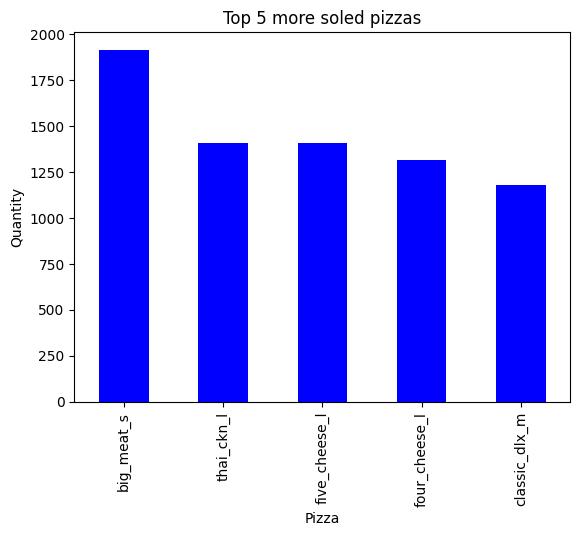

In [5]:
df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar', color=['blue'])
plt.title('Top 5 more soled pizzas')
plt.xlabel('Pizza')
plt.ylabel('Quantity')
plt.show();

In [6]:
# See some data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


We have non-null values :)

In [7]:
# Im going to make a copy of the original DB
# to do some manipulation of the data
df_copy = df.copy()
df_copy.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
# Since we have order_date on datetime64 as Dtype
# We can extract the de day to see when are more sells
df_copy['day_of_week'] = df_copy['order_date'].dt.day_name()
df_copy.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday


In [9]:
# Days of week
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Now let's see the number of sells per day
df_copy.groupby('day_of_week')['quantity'].sum().reindex(dias_semana)

,quantity
day_of_week,
Monday,6485
Tuesday,6895
Wednesday,6946
Thursday,7478
Friday,8242
Saturday,7493
Sunday,6035


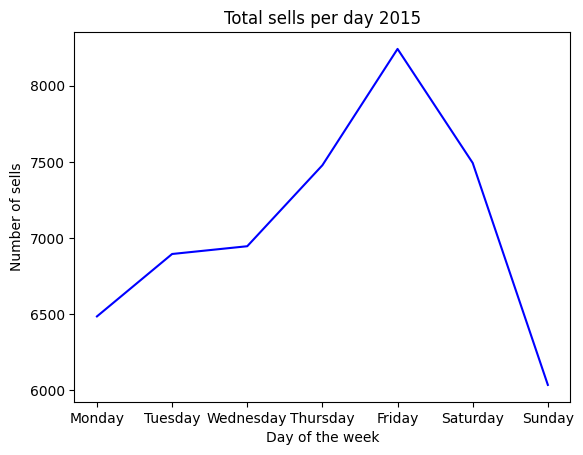

In [10]:
# Let's visualize
df_copy.groupby('day_of_week')['quantity'].sum().reindex(dias_semana).plot(kind='line', color='Blue')
plt.title('Total sells per day 2015')
plt.xlabel('Day of the week')
plt.ylabel('Number of sells')
plt.show();

In [11]:
# Let see friday more a little deeper
columna_temporal = pd.to_datetime(df_copy['order_time'], format='%H:%M:%S')
df_copy['Hour'] = columna_temporal.dt.hour

In [12]:
# Let's visualize
df_copy.head(1)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,Hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11


In [13]:
df_copy[df_copy['day_of_week'] == 'Friday'].groupby('Hour')['quantity'].sum()

,quantity
Hour,
11,388
12,1101
13,1040
14,525
15,441
16,578
17,759
18,936
19,748


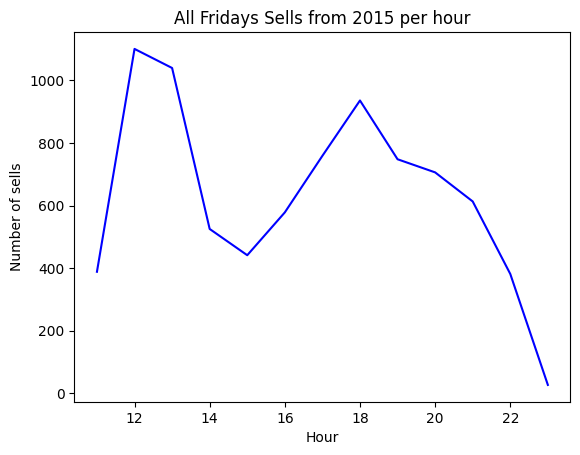

In [14]:
# Let's plot all fridays from 2015
df_copy[df_copy['day_of_week'] == 'Friday'].groupby('Hour')['quantity'].sum().plot(kind='line', color='Blue')
plt.title('All Fridays Sells from 2015 per hour')
plt.xlabel('Hour')
plt.ylabel('Number of sells')
plt.show();

## Extract from Original DB

Through the *EDA* I realized there is a table that I can extract from the `Data_Model_Pizza_Sales.xlsx`, which Im going to call it `catalogo.xlsx` and it posses all the important information about the pizzas the restaurat is selling. With that I'd be able to make a relational base on Power BI.

In [15]:
# Ok now to be able to make a relational DB on Power BI
# Im going to extract some data from the original Dataset
df_catalogo = df_copy[['pizza_id', 'unit_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']].drop_duplicates().reset_index(drop=True)
df_catalogo

,pizza_id,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,hawaiian_m,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,classic_dlx_m,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,five_cheese_l,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,ital_supr_l,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,mexicana_m,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...
86,the_greek_l,20.50,L,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
87,soppressata_m,16.50,M,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
88,soppressata_s,12.50,S,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
89,calabrese_l,20.25,L,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza


In [16]:
df_catalogo.to_excel('catalogo.xlsx', index=False)

# To wrap up...
On an annual basis, Fridays are the busiest days for the restaurant. Peak hours typically occur between 12 PM and 1 PM, followed by another surge between 5 PM and 6 PM. I will perform a month-by-month breakdown using Power BI for further detail and visualization.